In [2]:
#美国社会保障总署提供了一份从1880年到2010年的婴儿名字频率数据
#Hadley Wickham（许多流行R包的作者）经常用这份数据来延时R的数据处理功能
from __future__ import division
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 5))
np.set_printoptions(precision=4)
%pwd

u'/Users/xumenger/Desktop/code/Python-for-Data-Analysis/20170623-ch02-introduce'

In [4]:
#用Unix的head命令查看一个文件的前十行
!head -n 10 data/names/yob1880.txt

In [6]:
#由于这是一个非常标准的以逗号隔开的格式，所以可以用pandas.read_csv将其加载到DataFrame中
import pandas as pd
names1880 = pd.read_csv('./data/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880[:10]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [7]:
#这些文件中仅含有当年出现超过5次的名字，为了简单起见，我们可以用births列的sex分组小计表示该年度的births总结
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [9]:
#由于该数据集按年度被分隔成多个文件，所以第一件事就是要将所有数据都组装到一个DataFrame中，并加上一个year字段
#使用pandas.concat即可达到这个目的

#2010是目前最后一个有效统计年度
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = './data/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
#将所有的数据整合到单个DataFrame中
names = pd.concat(pieces, ignore_index=True)

In [10]:
names[:10]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [11]:
#有了这些数据后，我们就可以利用groupby和pivot_table在year和sex级别上对其进行聚合了
total_births = names.pivot_table(values='births', index=['year'], columns='sex', aggfunc=sum)

In [12]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [14]:
#下面我们来插入一个prop列，用于存放指定名字的婴儿数相对于总出生数的比例
#prop值为0.02表示每100个婴儿中有2名取了当前这个名字。因此，我们先按year和sex分组，然后再将新列加到各个分组上
def add_prop(group):
    #整数除法会向下圆整
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [15]:
#在执行这样的分组处理时，一般都应该做一些有效性检查，比如验证所有分组的prop的总和是否为1
#由于这是浮点型数据，所以应该使用np.allclose来检查这个分组总计值是否足够近似于1
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [20]:
#为了便于实现更进一步的分析，需要取出该数据的一个子集：每对sex/year组合的前1000个名字
#这又是一个分组操作
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

/Users/xumenger/Desktop/code/Laboratory/_LAB/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  after removing the cwd from sys.path.


In [21]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [23]:
#有了完整的数据集和刚才生成的top1000数据集，就可以开始分析各种命名趋势了
#首先将前1000个名字分为男女两个部分
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [24]:
#这是两个简单的时间序列，只需稍作调整即可绘制相应的图表
#下面绘制一张按year和name统计的总出生数透视表
total_births = top1000.pivot_table(values='births', index=['year'], columns='name', aggfunc=sum)
total_births[:10]

/Users/xumenger/Desktop/code/Laboratory/_LAB/lib/python2.7/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [26]:
#现在用DataFrame的plot方法绘制几个名字的曲线图
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1164ccb90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11821d190>], dtype=object)

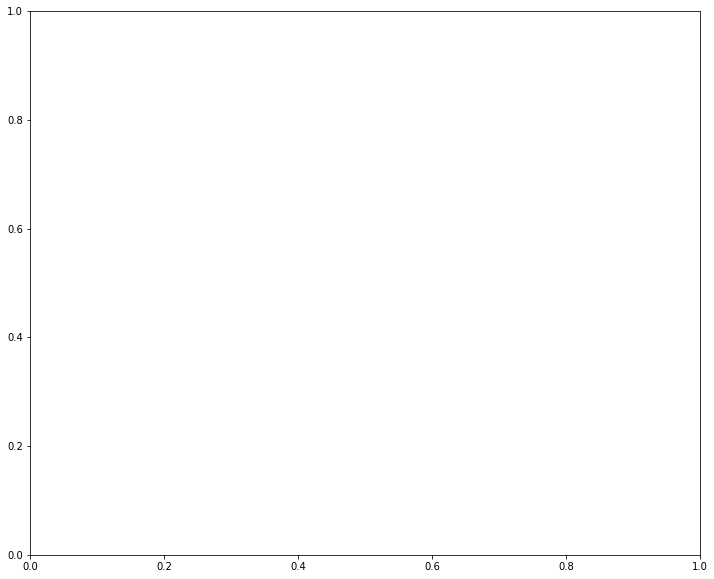

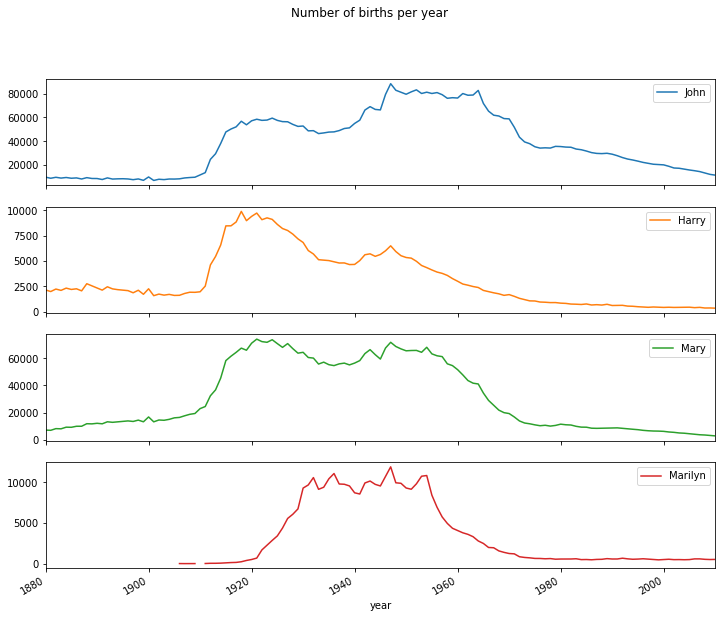

In [28]:
import matplotlib.pyplot as plt
plt.show()

/Users/xumenger/Desktop/code/Laboratory/_LAB/lib/python2.7/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


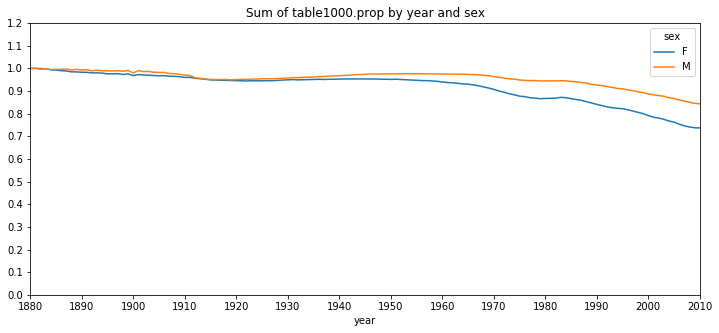

In [30]:
#上图反映的降低情况可能意味着父母愿意给小孩起常见名字越来越少
#这个假设可以从数据中得到验证，一个办法是计算最流行的1000个名字所占的比例，按year和sex进行聚合并绘图
table = top1000.pivot_table(values='prop', index=['year'], columns='sex', aggfunc='sum')
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))
plt.show()

In [31]:
#可以看出，名字的多样性确实出现了增长（前1000项的比例降低）
#另一个办法是计算占总出生人数前50%的不同名字的数量，这个数字不太好计算
#只考虑2010年男孩的名字
df = boys[boys.year == 2010]
df[:10]

name sex  births  year      prop
year sex                                               
2010 M   1676644      Jacob   M   21875  2010  0.011523
         1676645      Ethan   M   17866  2010  0.009411
         1676646    Michael   M   17133  2010  0.009025
         1676647     Jayden   M   17030  2010  0.008971
         1676648    William   M   16870  2010  0.008887
         1676649  Alexander   M   16634  2010  0.008762
         1676650       Noah   M   16281  2010  0.008576
         1676651     Daniel   M   15679  2010  0.008259
         1676652      Aiden   M   15403  2010  0.008114
         1676653    Anthony   M   15364  2010  0.008093

In [32]:
#在对prop进行降序排列之后，想知道前面多少个名字的人数加起来才够50%
#虽然编写一个for循环确实也能达到目的，但NumPy有一种更聪明的矢量方式
#先计算prop的累计和cumsum，然后再通过searchsorted方法找出0.5应该被插入到哪个位置才能保证不破坏顺序
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

/Users/xumenger/Desktop/code/Laboratory/_LAB/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  after removing the cwd from sys.path.


year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

In [33]:
prop_cumsum.searchsorted(0.5)

array([116])

In [34]:
#由于数组索引是从0开始的，因此我们要给这个结果+1，最终结果是117
#拿1900年的数据来做比较，这个数字要小的多
df = boys[boys.year == 1900]
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

/Users/xumenger/Desktop/code/Laboratory/_LAB/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  after removing the cwd from sys.path.


array([25])

In [86]:
#现在就可以对所有year/sex组合执行这个计算了。按这两个字段进行groupby处理，然后用一个函数计算各分组的这个值
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)[0] + 1
#注意！！！这里和书本不一样，上面看到python3的searchsorted()返回的是ndarray类型
#需要先取[0]元素，才能获得想要的数据，如果不作该处理，绘图会报错

In [87]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

/Users/xumenger/Desktop/code/Laboratory/_LAB/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
/Users/xumenger/Desktop/code/Laboratory/_LAB/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
/Users/xumenger/Desktop/code/Laboratory/_LAB/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


In [88]:
diversity.plot(title="Number of popular names in 50%")

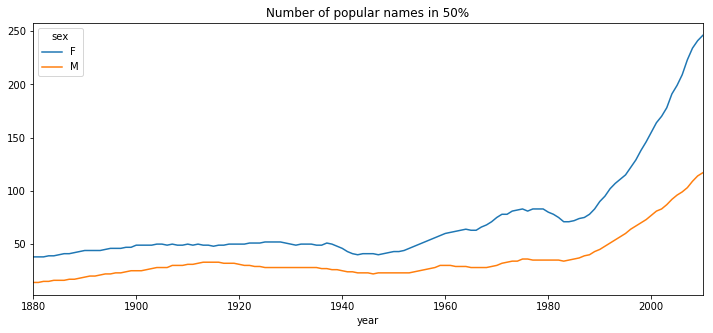

In [89]:
plt.show()

In [91]:
#2007年，一名婴儿姓名研究人员在她的网站上指出：近百年来，男孩名字在最后一个字母上的分布发生了显著的变化
#为了了解具体的情况，首先将全部出生数据在年度、性别以及末字母上进行聚合

#从name列选出最后一个字母
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table(values='births', index=[last_letters], columns=['sex', 'year'], aggfunc='sum')

In [93]:
#选出具有一定代表性的三年，并输出前面几行
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [95]:
#接下来需要按照总出生数对该表进行规范化处理，以便计算出各性别各末字母占出生人数的比例
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [97]:
letter_prop = subtable / subtable.sum().astype(float)

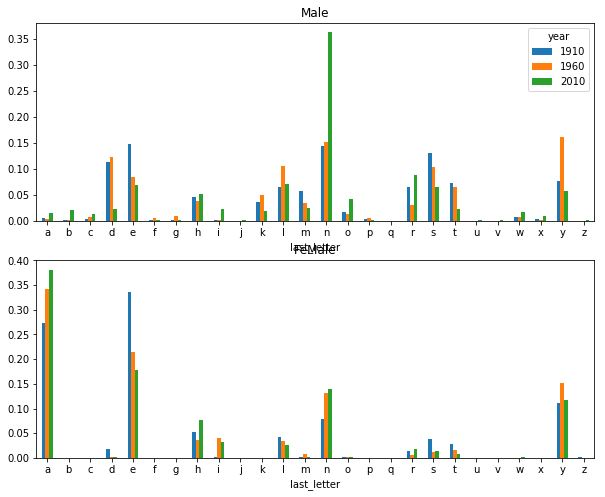

In [100]:
#有了这个字母比例数据之后，就可以生成一张各年度各性别的条形图了
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='FeMale', legend=False)
plt.show()

In [103]:
#从上图可以看出，从20世纪60年代开始，以字母n 结尾的男孩名出现了明显的增长
#回到之前创建的那张完整表，按年度和性别对其进行规范化处理，并在男孩名字中选取几个字母，最后进行转置以便将各个列做成一个时间序列
letter_prop = table / table.sum().astype(float)

In [104]:
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

/Users/xumenger/Desktop/code/Laboratory/_LAB/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


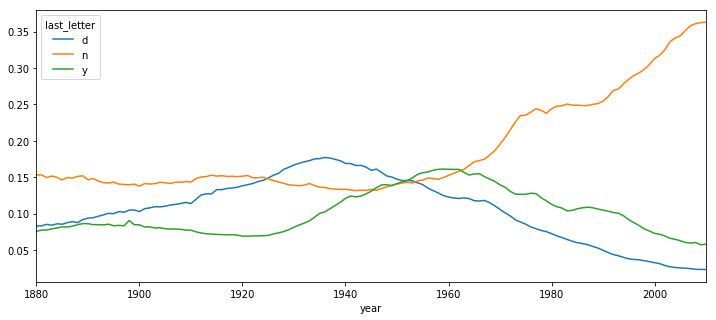

In [106]:
#有了这个时间序列的DataFrame之后，就可以通过其plot方法绘制出一张趋势图了
dny_ts.plot()
plt.show()

In [109]:
#另外一个有趣的趋势是，早年流行于男孩的名字近年来“变性了”，例如Lesley、Leslie
#回到top1000数据集，找出其中以Lesl开头的名字
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [110]:
#然后利用这个结果过滤其他的名字，并按名字分组计算出生数以查看相对频率
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [111]:
#接下来，按照性别和年度进行聚合，并按年度进行规范化处理
table = filtered.pivot_table(values='births', index=['year'], columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


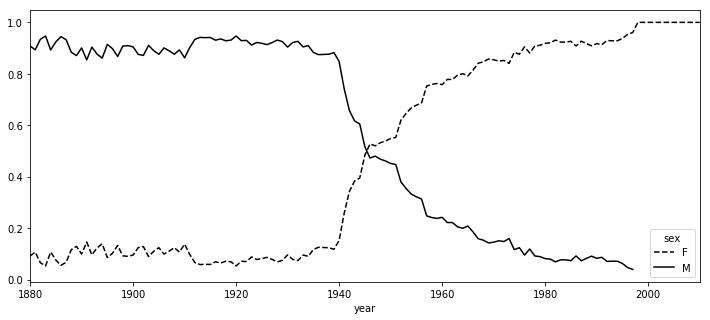

In [112]:
table.plot(style={'M': 'k-', 'F': 'k--'})
plt.show()